In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import random
import mediapipe as mp
# import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # Small delay to ensure windows close properly


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
len(results.left_hand_landmarks.landmark)

21

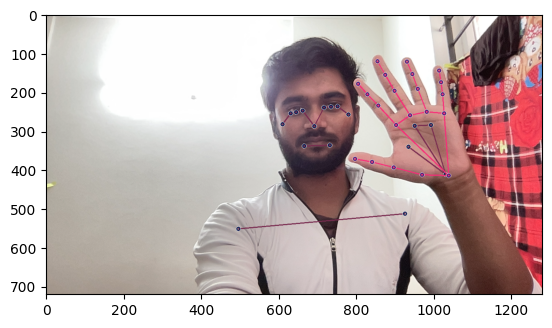

In [13]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


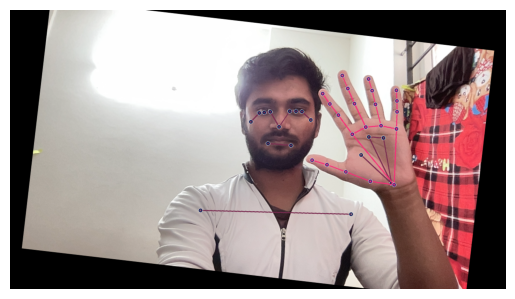

In [14]:
# Randomly generate an angle between -40 and +40 degrees
angle = random.uniform(-10, 10)

# Get the dimensions of the image
(h, w) = frame.shape[:2]
center = (w // 2, h // 2)

# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=0.9)

# Perform the rotation
rotated_frame = cv2.warpAffine(frame, rotation_matrix, (w, h))

# Display the rotated image
plt.imshow(cv2.cvtColor(rotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [18]:
result_test = extract_keypoints(results)
print(result_test)
print(len(result_test))

[ 5.40930629e-01  4.00714874e-01 -5.19848347e-01  9.99993920e-01
  5.60411513e-01  3.33491027e-01 -4.73715216e-01  9.99988794e-01
  5.74234426e-01  3.31290722e-01 -4.73287672e-01  9.99987543e-01
  5.87645173e-01  3.30264270e-01 -4.72821534e-01  9.99988675e-01
  5.17873645e-01  3.45774263e-01 -4.76252168e-01  9.99986827e-01
  5.04482865e-01  3.51120085e-01 -4.75452423e-01  9.99981403e-01
  4.93282139e-01  3.55243772e-01 -4.75588739e-01  9.99979436e-01
  6.10026300e-01  3.59139323e-01 -2.08960131e-01  9.99989033e-01
  4.77318436e-01  3.94236416e-01 -2.19582587e-01  9.99984622e-01
  5.72036147e-01  4.68644828e-01 -4.25104767e-01  9.99987066e-01
  5.20794511e-01  4.71080393e-01 -4.28888083e-01  9.99985039e-01
  7.23951399e-01  7.13734448e-01 -1.07452765e-01  9.99812663e-01
  3.87852609e-01  7.66826570e-01 -1.07628763e-01  9.97924805e-01
  9.13816154e-01  1.02348542e+00 -5.08911908e-01  9.62439835e-01
  3.98208559e-01  1.26691961e+00 -1.86809897e-01  9.40916389e-02
  8.05998445e-01  5.72513

In [19]:
33*4+21*3+21*3

258

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 5.40930629e-01,  4.00714874e-01, -5.19848347e-01,  9.99993920e-01,
        5.60411513e-01,  3.33491027e-01, -4.73715216e-01,  9.99988794e-01,
        5.74234426e-01,  3.31290722e-01, -4.73287672e-01,  9.99987543e-01,
        5.87645173e-01,  3.30264270e-01, -4.72821534e-01,  9.99988675e-01,
        5.17873645e-01,  3.45774263e-01, -4.76252168e-01,  9.99986827e-01,
        5.04482865e-01,  3.51120085e-01, -4.75452423e-01,  9.99981403e-01,
        4.93282139e-01,  3.55243772e-01, -4.75588739e-01,  9.99979436e-01,
        6.10026300e-01,  3.59139323e-01, -2.08960131e-01,  9.99989033e-01,
        4.77318436e-01,  3.94236416e-01, -2.19582587e-01,  9.99984622e-01,
        5.72036147e-01,  4.68644828e-01, -4.25104767e-01,  9.99987066e-01,
        5.20794511e-01,  4.71080393e-01, -4.28888083e-01,  9.99985039e-01,
        7.23951399e-01,  7.13734448e-01, -1.07452765e-01,  9.99812663e-01,
        3.87852609e-01,  7.66826570e-01, -1.07628763e-01,  9.97924805e-01,
        9.13816154e-01,  

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Point_Dataset_5') 

# Actions that we try to detect
actions = np.array(['forward', 'backward', 'pause-play','full-screen','normal-screen'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30

In [8]:
for action in actions: 
    for sequence in range(3*no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [9]:
def getRotationMatrix(image, angle):
    # Get the dimensions of the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Compute the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    return rotation_matrix

def rotate_image(image, rotation_matrix):
    (h, w) = image.shape[:2]
    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

def generateData(frames,action,sequence):
    leftAngle=random.uniform(-10,0)
    rightAngle=random.uniform(0,10)

    left_rotation_matrix = getRotationMatrix(frames[0],leftAngle)
    right_rotation_matrix = getRotationMatrix(frames[0],rightAngle)
    for i in range(len(frames)):
        left_frame=rotate_image(frames[i],left_rotation_matrix)
        right_frame=rotate_image(frames[i],right_rotation_matrix)

        _, results = mediapipe_detection(frame, holistic)
        _, left_results = mediapipe_detection(left_frame, holistic)
        _, right_results = mediapipe_detection(right_frame, holistic)

        keypoints = extract_keypoints(results)
        left_keypoints = extract_keypoints(left_results)
        right_keypoints = extract_keypoints(right_results)

        npy_path = os.path.join(DATA_PATH, action, str(3*sequence), str(i))
        left_npy_path = os.path.join(DATA_PATH, action, str(3*sequence+1), str(i))
        right_npy_path = os.path.join(DATA_PATH, action, str(3*sequence+2), str(i))
        
        np.save(npy_path, keypoints)
        np.save(left_npy_path, left_keypoints)
        np.save(right_npy_path, right_keypoints)

    

In [ ]:
cap = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
broken=False

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            frames=[]
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frames.append(frame)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    broken=True
                    break
            
            if broken == True:
                break
            generateData(frames,action,sequence)

        if broken == True:
            break
                    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # Small delay to ensure windows close properly



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
2024-11-05 15:13:15.373 Python[6241:330939] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-05 15:13:15.373 Python[6241:330939] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
